In [7]:
!pip install umap-learn

In [9]:
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('exoTest.csv')

In [ ]:
data.head()

In [ ]:
data.isna().sum()

In [ ]:
data['LABEL'].value_counts().plot(kind = 'bar', title = 'Class Distributions \n (1: Not Exoplanet || 2: Exoplanet)', rot=0)

In [ ]:
data.info()

In [ ]:
#Visualizing the the 5 five rercords
plt.figure(figsize=(25,10))
plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(data.iloc[0,])
plt.plot(data.iloc[1,])
plt.plot(data.iloc[2,])
plt.plot(data.iloc[3,])
plt.plot(data.iloc[4,])
plt.legend(('Data1', 'Data2', 'Data3', 'Data4', 'Data5'))
plt.show()

In [ ]:
Exoplanet = data[data['LABEL']==1]
Not_Exoplanet = data[data['LABEL']==0]

In [ ]:
for i in range(5):
    flux = random.choice(Exoplanet.index)
    plt.figure(figsize=(20,10))
    plt.hist(Exoplanet.iloc[flux,:], bins=100)
    plt.title("Gaussian Histogram of Exoplanets")
    plt.xlabel("Flux values")
    plt.show()

In [ ]:
for i in range(5):
    flux = random.choice(Not_Exoplanet.index)
    plt.figure(figsize=(20,10))
    plt.hist(Not_Exoplanet.iloc[flux,:], bins=100)
    plt.title("Gaussian Histogram of Non Exoplanets")
    plt.xlabel("Flux values")
    plt.show()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
X

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func=f_classif, k=30)
fit = test.fit(X, y)

In [ ]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions

set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

In [ ]:
features.shape

In [ ]:
objList = data.columns
print(objList)

In [ ]:
data.drop(data.iloc[:, 31:3198], inplace = True, axis = 1)
  
data

In [ ]:
data.to_csv('processed_data.csv')

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
y = data['LABEL'].values

X = data.drop(['LABEL'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Machine Learning

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)

In [48]:
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[113   0]
 [  1   0]]


In [49]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) *100 
print(val1)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

0.008771929824561403
99.12280701754386
0.0
100.0


# Voting Classifier

In [50]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[113   0]
 [  1   0]]


In [51]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) * 100
print(val3)
from sklearn import metrics
VOT_sensitivity = ((TP / float(FN + TP))) * 100

print(VOT_sensitivity)
VOT_specificity = ((TN / (TN + FP))) * 100

print(VOT_specificity)

0.008771929824561403
99.12280701754386
0.0
100.0


# KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions)  *100 
print(val2)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP)))* 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

*Confusion Matrix for KNN: 
[[113   0]
 [  1   0]]
0.008771929824561403
99.12280701754386
0.0
100.0


In [53]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[112   1]
 [  1   0]]


In [54]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val4 = accuracy_score(y_test, predictions) * 100
print(val4)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

0.017543859649122806
98.24561403508771
0.0
99.11504424778761


In [55]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for MLP: 
[[107   6]
 [  1   0]]


In [56]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val5 = accuracy_score(y_test, predictions) * 100
print(val5)
from sklearn import metrics
MLP_sensitivity = ((TP / float(FN + TP))) * 100

print(MLP_sensitivity)
MLP_specificity = ((TN / (TN + FP))) * 100

print(MLP_specificity)

0.06140350877192982
93.85964912280701
0.0
94.69026548672566


# CNN

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

seed = 42
np.random.seed(seed)

Using TensorFlow backend.


In [59]:
X_train.shape

(456, 30)

In [60]:
BATCH_SIZE = 16

## Create our model
model = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, input_dim=30, activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, activation='sigmoid' ))

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

In [61]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=BATCH_SIZE,
                    verbose=0)


In [64]:
cnn = history.history['accuracy']
cnn_acc = cnn[49]
cnn_acc

0.9276315569877625

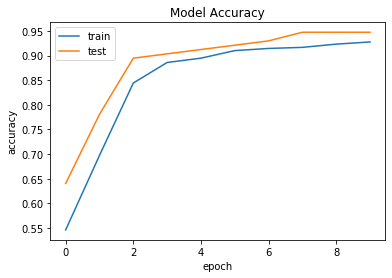

In [62]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

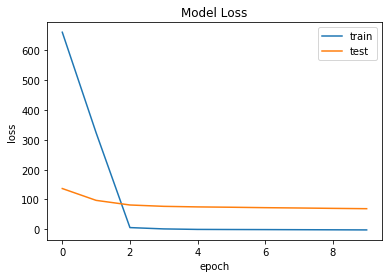

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# RNN

In [65]:
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [66]:
def rnn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [67]:
model = rnn()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 30)]              0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               3968      
_________________________________________________________________
BC1 (BatchNormalization)     (None, 128)               512       
_________________________________________________________________
Activation1 (Activation)     (None, 128)               0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 128)               16512     
_________________________________________________________________
BC2 (BatchNormalization)     (None, 128)              

In [68]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [70]:
history = model.fit(x=X_train, y=y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

In [71]:
rnn = history.history['accuracy']
rnn_acc = rnn[49]
rnn_acc

0.9912280440330505

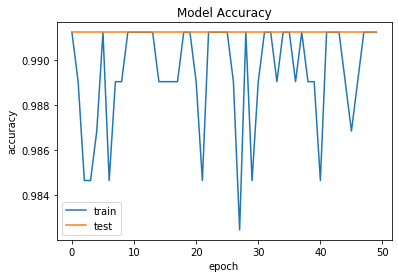

In [72]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

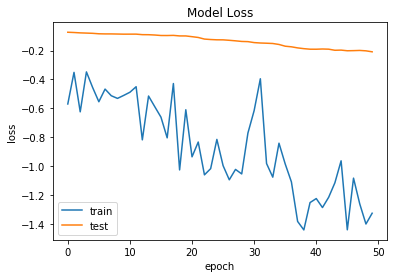

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

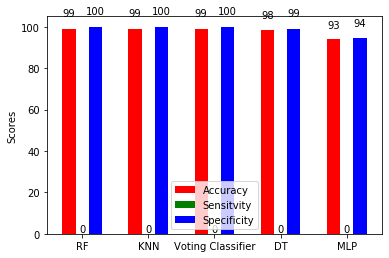

In [74]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1,val2,val3,val4,val5]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [RF_sensitivity,KNN_sensitivity,VOT_sensitivity,DT_sensitivity,MLP_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [RF_specificity,KNN_specificity,VOT_specificity,DT_specificity,MLP_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('RF','KNN','Voting Classifier','DT','MLP') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

In [78]:
score = [val1,val2,val3,val4,val5,cnn_acc*100,rnn_acc*100]

In [79]:
#make variabel for save the result and to show it
classifier = ('Random Forest','KNN','Voting Classifier','Decision Tree','MLP','CNN','RNN')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6]
[99.12280701754386, 99.12280701754386, 99.12280701754386, 98.24561403508771, 93.85964912280701, 92.76315569877625, 99.12280440330505]


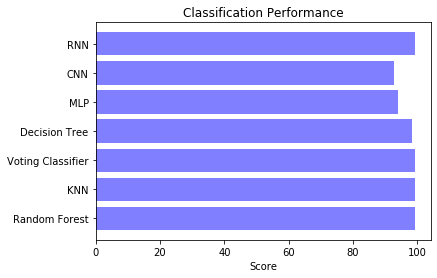

In [80]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [81]:
import joblib
filename = 'model.sav'
joblib.dump(RF, filename)

['model.sav']